In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the csv file
df = pd.read_csv(r"C:\Users\jethro\Desktop\retail_sales_dataset.csv")

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
# Null check
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [4]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Transaction ID      1000 non-null int64
Date                1000 non-null object
Customer ID         1000 non-null object
Gender              1000 non-null object
Age                 1000 non-null int64
Product Category    1000 non-null object
Quantity            1000 non-null int64
Price per Unit      1000 non-null int64
Total Amount        1000 non-null int64
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
# Check total rows and columns
df.shape

(1000, 9)

In [8]:
# Organizing count of customers
emptyline = []

for i in df['Customer ID']:
    if i is not None and i != '':
        emptyline.append(1)
emptyline = pd.DataFrame(emptyline)
emptyline = emptyline.rename(columns = {0: 'Count'})
df = pd.concat([df.reset_index(drop = True), emptyline], axis = 1)

In [9]:
#Describe the dataset
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Count
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0
mean,500.500000,41.39200,2.514000,179.890000,456.000000,1.0
std,288.819436,13.68143,1.132734,189.681356,559.997632,0.0
min,1.000000,18.00000,1.000000,25.000000,25.000000,1.0
25%,250.750000,29.00000,1.000000,30.000000,60.000000,1.0
50%,500.500000,42.00000,3.000000,50.000000,135.000000,1.0
75%,750.250000,53.00000,4.000000,300.000000,900.000000,1.0
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,1.0


In [10]:
# Removing duplicates
df = df.drop_duplicates('Customer ID', keep = 'first')

In [11]:
# Checking total amount per Category
df.groupby(['Product Category']).sum()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Count
Product Category,,,,,,
Beauty,150864,12394,771,56505,143515,307
Clothing,173725,14724,894,61175,155580,351
Electronics,175911,14274,849,62210,156905,342


In [12]:
# Checking total amount by Gender
df.groupby(['Gender']).sum()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Count
Gender,,,,,,
Female,253756,21092,1298,91835,232840,510
Male,246744,20300,1216,88055,223160,490


In [13]:
# Checking total amount by Age
df.groupby(['Age']).sum()

,Transaction ID,Quantity,Price per Unit,Total Amount,Count
Age,,,,,
18,8224,54,4325,11215,21
19,9695,57,5220,14870,21
20,10841,47,2850,8645,21
21,9020,50,5005,12585,20
22,11833,65,5090,13700,27
23,10674,57,3735,8220,24
24,9076,36,1735,5415,15
25,9468,46,4475,9900,20
26,12029,53,5765,13980,22


### How does customer age and gender influence their purchasing behavior?

In [60]:
# Customizing Age Category
age_group = []

for age in df['Age']:
    if (age >= 18) & (age <= 30):
        age_group.append('Young Adult')
    elif (age > 30) & (age <= 45):
        age_group.append('Middle-Age Adult')
    else:
        age_group.append('Old Adult')
age_group = pd.DataFrame(age_group)
age_group = age_group.rename(columns = {0: "Age Category"})
df = pd.concat([df.reset_index(drop = True), age_group], axis = 1)

In [65]:
# Grouping Age Category
df_age_cat = df.groupby('Age Category').sum().sort_values('Total Amount', ascending = False)

df_age_cat

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Count,Year,Month,Day
Age Category,,,,,,,,,
Old Adult,221395,23295,1056,75430,181100,424,857753,2758,6691
Middle-Age Adult,147734,11569,773,52880,141955,303,612970,2036,4430
Young Adult,131371,6528,685,51580,132945,273,552279,1755,4189


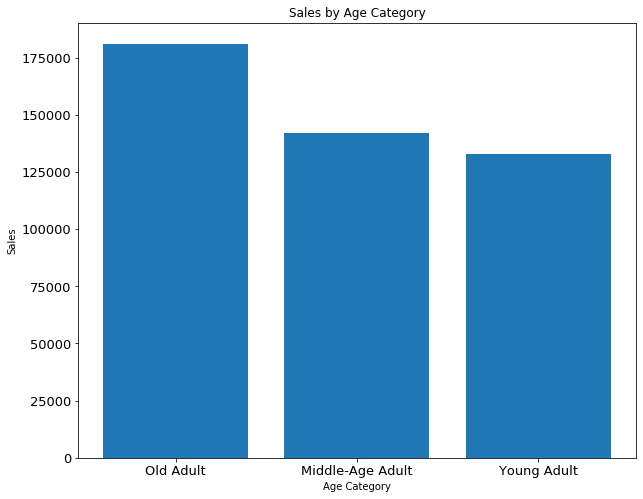

In [67]:
# Age Category Index
df_ac = df_age_cat.iloc[0:,:0]
df_ac_list = ['Old Adult', 'Middle-Age Adult', 'Young Adult']

# Create an array of the same length as ages for the x-axis positions
df_ac_axis = np.arange(len(df_ac))

# Create the bar plot
plt.bar(df_ac_axis, df_age_cat['Total Amount'])

# Customize the plot
plt.xlabel('Age Category')
plt.ylabel('Sales')
plt.title('Sales by Age Category')
plt.xticks(df_ac_axis, df_ac_list)
#plt.figure(figsize=(10,8))
plt.rcParams['figure.figsize'] = [10,8]

# Show the plot
plt.show()

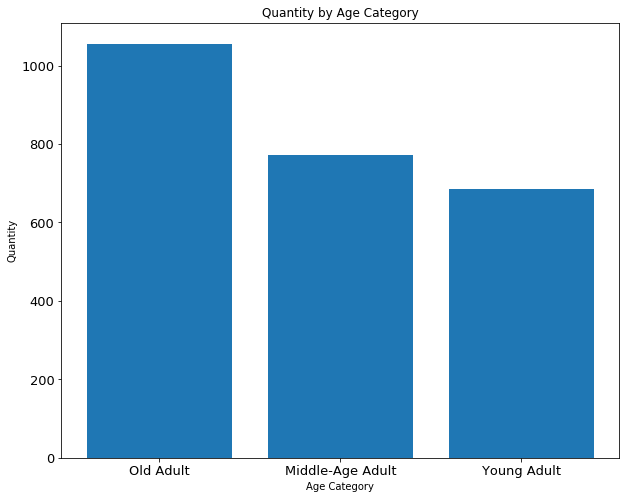

In [70]:
# Age Category Index
df_ac2 = df_age_cat.iloc[0:,:0]
df_ac_list2 = ['Old Adult', 'Middle-Age Adult', 'Young Adult']

# Create an array of the same length as ages for the x-axis positions
df_ac_axis2 = np.arange(len(df_ac2))

# Create the bar plot
plt.bar(df_ac_axis2, df_age_cat['Quantity'])

# Customize the plot
plt.xlabel('Age Category')
plt.ylabel('Quantity')
plt.title('Quantity by Age Category')
plt.xticks(df_ac_axis2, df_ac_list2)
#plt.figure(figsize=(10,8))
plt.rcParams['figure.figsize'] = [10,8]

# Show the plot
plt.show()

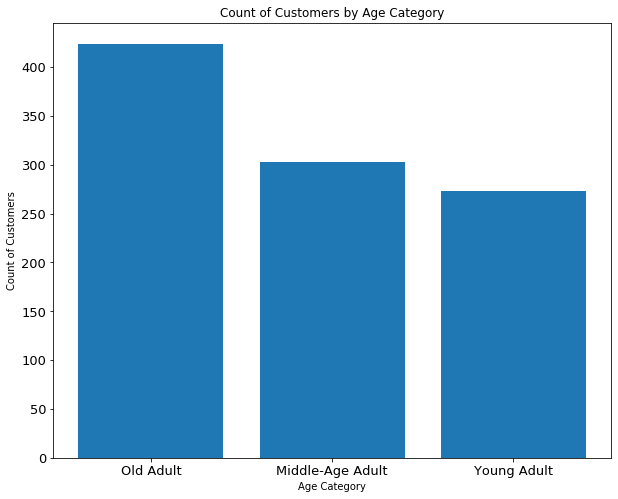

In [71]:
# Age Category Index
df_ac3 = df_age_cat.iloc[0:,:0]
df_ac_list3 = ['Old Adult', 'Middle-Age Adult', 'Young Adult']

# Create an array of the same length as ages for the x-axis positions
df_ac_axis3 = np.arange(len(df_ac3))

# Create the bar plot
plt.bar(df_ac_axis3, df_age_cat['Count'])

# Customize the plot
plt.xlabel('Age Category')
plt.ylabel('Count of Customers')
plt.title('Count of Customers by Age Category')
plt.xticks(df_ac_axis3, df_ac_list3)
#plt.figure(figsize=(10,8))
plt.rcParams['figure.figsize'] = [10,8]

# Show the plot
plt.show()

In [64]:
df.groupby('Age').sum().sort_values('Quantity', ascending = False).head()

,Transaction ID,Quantity,Price per Unit,Total Amount,Count,Year,Month,Day
Age,,,,,,,,
43,13480,89,6295,17970,31,62713,196,430
51,15809,84,6305,16065,30,60690,202,525
34,13182,72,5660,16785,28,56644,176,438
47,12446,72,4485,12505,26,52598,175,357
64,12694,70,4220,9125,31,62713,207,430


In [44]:
df.groupby('Age').sum().sort_values('Count', ascending = False).head()

,Transaction ID,Quantity,Price per Unit,Total Amount,Count,Year,Month,Day
Age,,,,,,,,
64,12694,70,4220,9125,31,62713,207,430
43,13480,89,6295,17970,31,62713,196,430
51,15809,84,6305,16065,30,60690,202,525
57,16569,68,4290,9290,30,60690,196,421
34,13182,72,5660,16785,28,56644,176,438


In [45]:
df.groupby('Age').sum().sort_values('Total Amount', ascending = False).head()

,Transaction ID,Quantity,Price per Unit,Total Amount,Count,Year,Month,Day
Age,,,,,,,,
43,13480,89,6295,17970,31,62713,196,430
34,13182,72,5660,16785,28,56644,176,438
51,15809,84,6305,16065,30,60690,202,525
19,9695,57,5220,14870,21,42483,131,273
26,12029,53,5765,13980,22,44506,145,422


In [14]:
#Grouping data by Age
df_age = df.groupby(['Age']).sum()

# Grouping data containing Male Gender by Age
df_male = df[df['Gender'] == 'Male'].groupby('Age').sum()

# Grouping data containing Female Gender by Age
df_female = df[df['Gender'] == 'Female'].groupby('Age').sum()

In [15]:
# Sorting and droping duplicates of Age
A = df.sort_values('Age', ascending = True).drop_duplicates('Age')

# Converting Age into List
B = A['Age'].tolist()

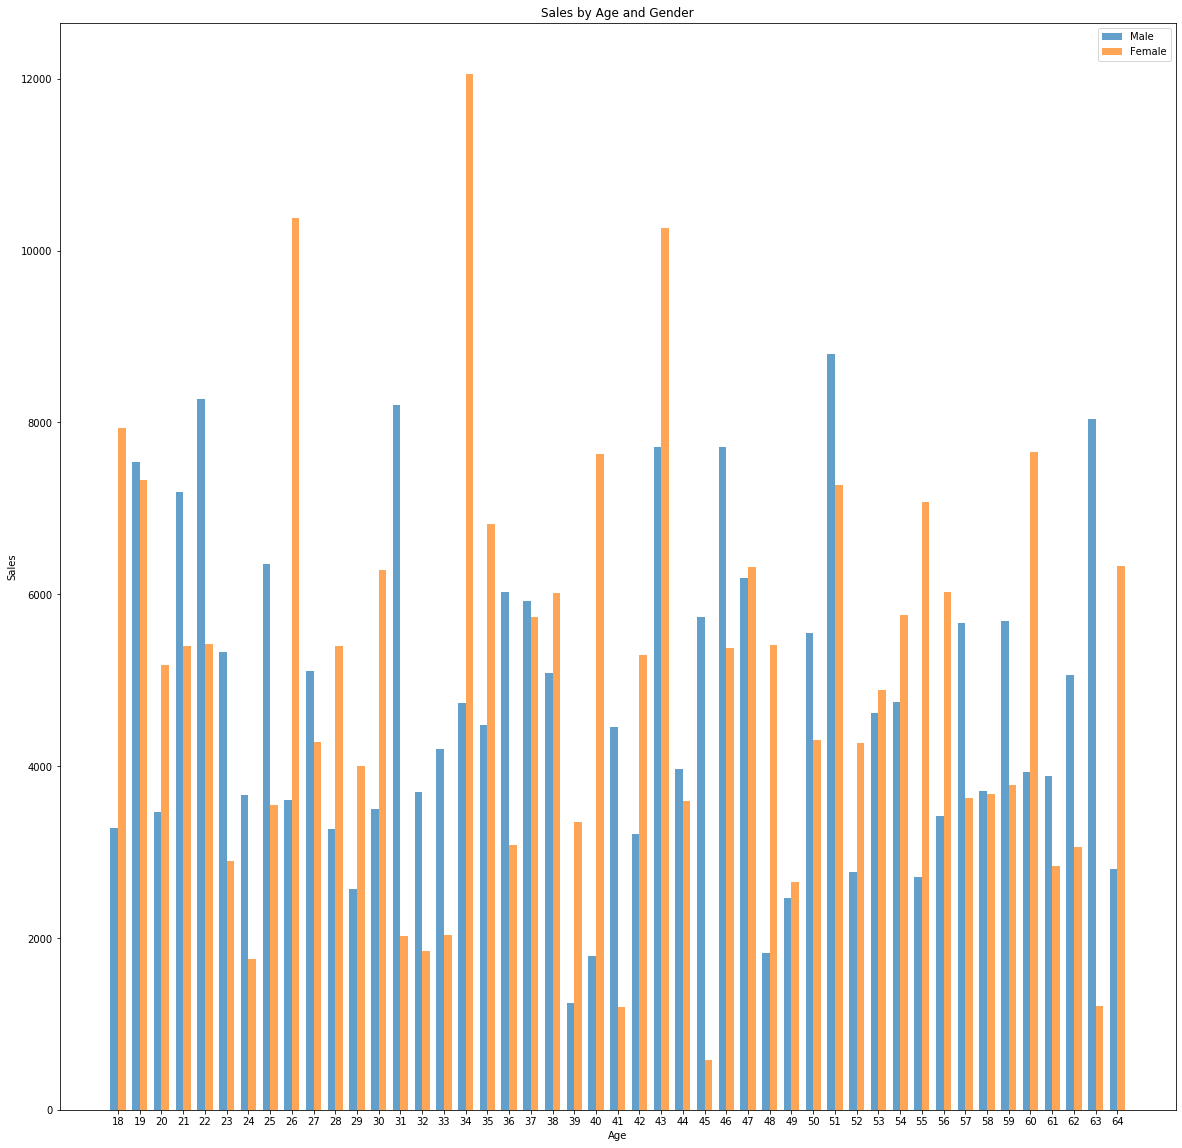

In [19]:
# Age Index
X = df_age.iloc[0:,:0]

# Create an array of the same length as ages for the x-axis positions
X_axis = np.arange(len(X))

# Set the width of the bars
bar_width = 0.35

# Create the bar plot
plt.bar(X_axis - bar_width/2, df_male['Total Amount'], bar_width, label='Male', alpha=0.7)
plt.bar(X_axis + bar_width/2, df_female['Total Amount'], bar_width, label='Female', alpha=0.7)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Sales')
plt.title('Sales by Age and Gender')
plt.xticks(X_axis, B)
plt.legend()
plt.rcParams['figure.figsize'] = [20,20]

# Show the plot
plt.show()

#### Conclusion:
            According to the analysis on Age Category, Old Age has the most Customers who buys in the retail, has bought most products, and has most sales in the retail. In Sales by Age and Gender, it shows that at the age 34, Female, has brought us the most sales, while for Male Gender, it is at the age of 51. 

### Are there discernible patterns in sales across different time periods?

In [20]:
# Splitting Date into Year, Month, and Day
df[['Year','Month','Day']] = df['Date'].str.split("-", expand=True).astype('int')

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Count,Year,Month,Day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,1,2023,11,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1,2023,2,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023,1,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,1,2023,5,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,1,2023,5,6


In [21]:
# Sorting Data by Month in ascending order
month_sorted = df.sort_values('Month', ascending = True)

# Grouping the sorted Month data
month_sorted_group = month_sorted.groupby('Month').sum()

# Converting the total amount into list
profit_list = month_sorted_group['Total Amount'].tolist()

In [22]:
# Removing Month duplicates
mon = month_sorted.drop_duplicates('Month')

# Converting Month into list
month_num_list = mon['Month'].tolist()

In [23]:
# Creating a list for X-axis label
month_list = [0, 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Converting list to Data Frame
mon_list = pd.DataFrame(month_list)

# Rename Column
mon_list=mon_list.rename(columns = {0:'Month'})

# Setting the Month Column as Index
mon_list.set_index('Month',inplace=True)

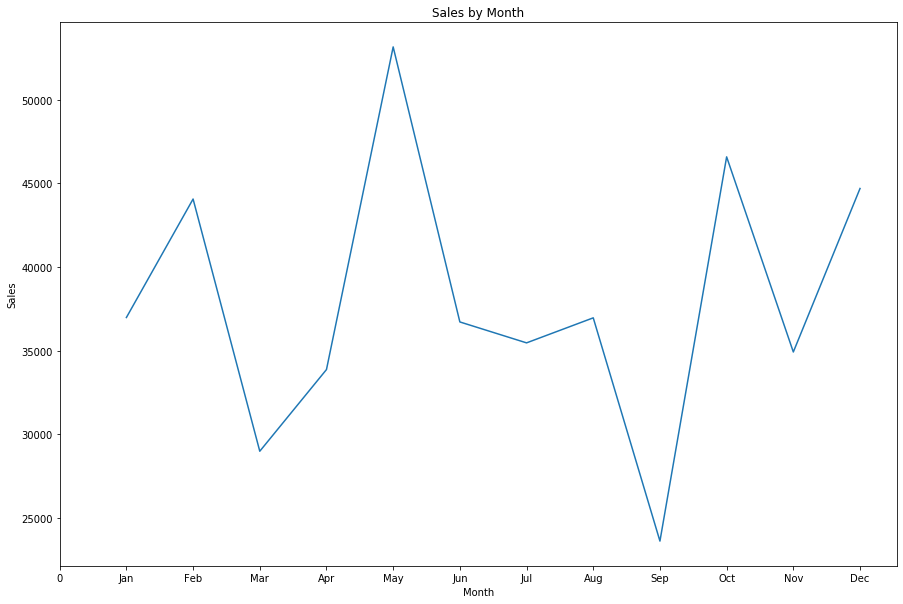

In [28]:
# Customizing the plot
plt.plot(month_num_list, profit_list)
plt.xticks(range(0,len(mon_list.index)),mon_list.index)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.rcParams['figure.figsize'] = [15,10]

# Show the plot
plt.show()

#### Conclusion:
            In this sales chart, the months of February, May, Oct, and Dec were our highest sales. This might be occured because of the holidays Valentine's Month, Octoberfest, and Christmas. The month of May is our highest sales due to Summer Vacation

### Which product categories hold the highest appeal among customers?

In [29]:
# Grouping data by Product Category
df_prod_cat = df.groupby('Product Category').sum()

df_prod_cat

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Count,Year,Month,Day
Product Category,,,,,,,,,
Beauty,150864,12394,771,56505,143515,307,621062,1993,4857
Clothing,173725,14724,894,61175,155580,351,710073,2170,5364
Electronics,175911,14274,849,62210,156905,342,691867,2386,5089


In [30]:
# Customizing X-axis Label
df_pc_drop = df.sort_values('Product Category').drop_duplicates('Product Category')
df_pc_list = df_pc_drop['Product Category'].tolist()
df_pc_list

['Beauty', 'Clothing', 'Electronics']

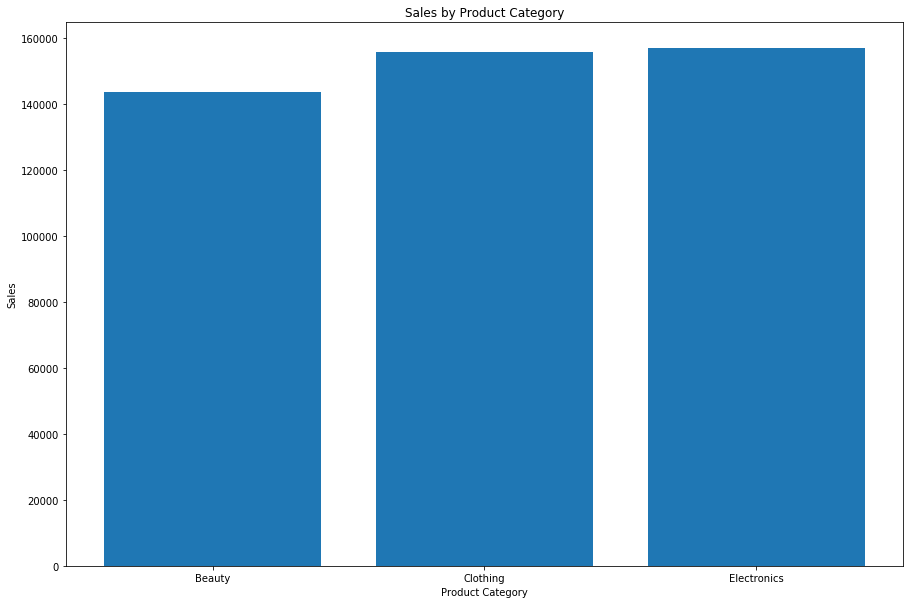

In [31]:
# Product Category Index
df_pc = df_prod_cat.iloc[0:,:0]

# Create an array of the same length as ages for the x-axis positions
df_pc_axis = np.arange(len(df_pc))

# Create the bar plot
plt.bar(df_pc_axis, df_prod_cat['Total Amount'])

# Customize the plot
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Sales by Product Category')
plt.xticks(df_pc_axis, df_pc_list)
#plt.figure(figsize=(10,8))
plt.rcParams['figure.figsize'] = [10,8]

# Show the plot
plt.show()

#### Conclusion:
        The Electronics category holds the highest sales in all category, however, the clothing category comes close enough to tie sales from the Electronics category.

### What are the relationships between age, spending, and product preferences?

In [32]:
# Grouping per Category by Age
df_beauty = df[df['Product Category'] == 'Beauty'].sort_values('Age').groupby('Age').sum()
df_clothing = df[df['Product Category'] == 'Clothing'].sort_values('Age').groupby('Age').sum()
df_elex = df[df['Product Category'] == 'Electronics'].sort_values('Age').groupby('Age').sum()

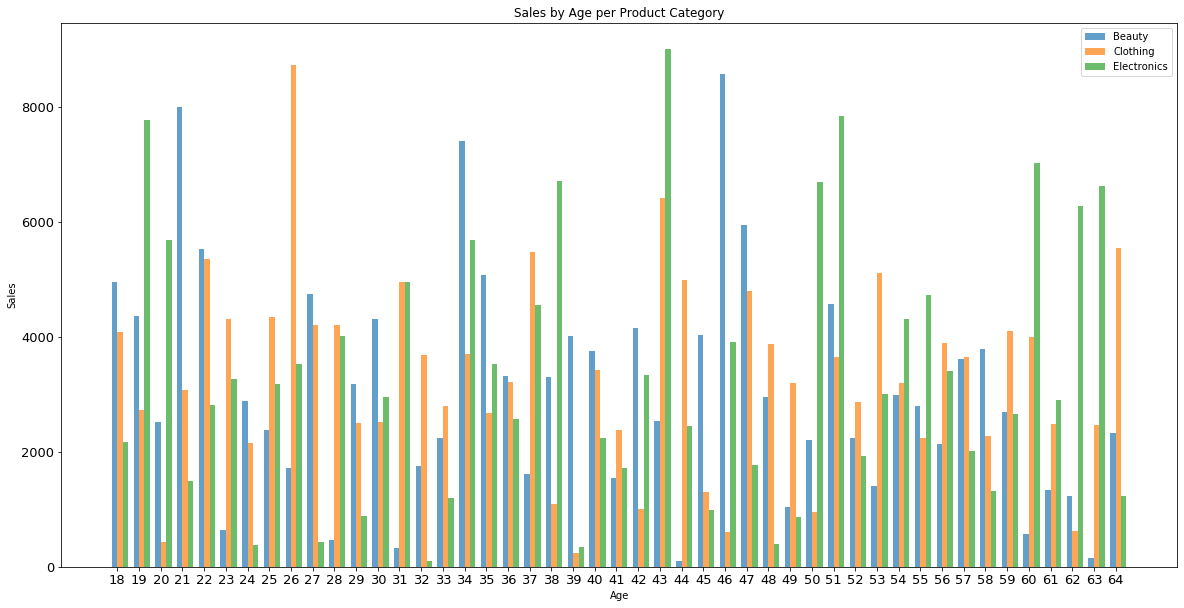

In [39]:
# Age Index
X = df_age.iloc[0:,:0]

# Create an array of the same length as ages for the x-axis positions
X_axis = np.arange(len(X))

# Set the width of the bars
bar_width = 0.25

# Create the bar plot
plt.bar(X_axis - bar_width/2, df_beauty['Total Amount'], bar_width, label='Beauty', alpha=0.7)
plt.bar(X_axis + bar_width/2, df_clothing['Total Amount'], bar_width, label='Clothing', alpha=0.7)
plt.bar(X_axis + (bar_width/2)*3 , df_elex['Total Amount'], bar_width, label='Electronics', alpha=0.7)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Sales')
plt.title('Sales by Age per Product Category')
plt.xticks(X_axis, B)
plt.legend()
plt.rcParams['figure.figsize'] = [20,20]
plt.rc('xtick', labelsize = 13)
plt.rc('ytick', labelsize = 13)

# Show the plot
plt.show()

#### Conclusion:
            At the age of 43 held the highest sales in Electronics category, while at the age of 26 held the highest sales in Clothing category, and the age of 46 held the highest sales in Beauty category.
            At the age of 43 onwards, it has the best average sales in the Beauty category

### How do customers adapt their shopping habits during seasonal trends?

In [34]:
# Grouping per Category by Month
df_b = df[df['Product Category'] == 'Beauty'].sort_values('Month').groupby('Month').sum()
df_c = df[df['Product Category'] == 'Clothing'].sort_values('Month').groupby('Month').sum()
df_e = df[df['Product Category'] == 'Electronics'].sort_values('Month').groupby('Month').sum()

In [35]:
# Creating a Dataframe for X-axis label
monther_list = pd.DataFrame(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set column into index
monther_list = monther_list.set_index(0)

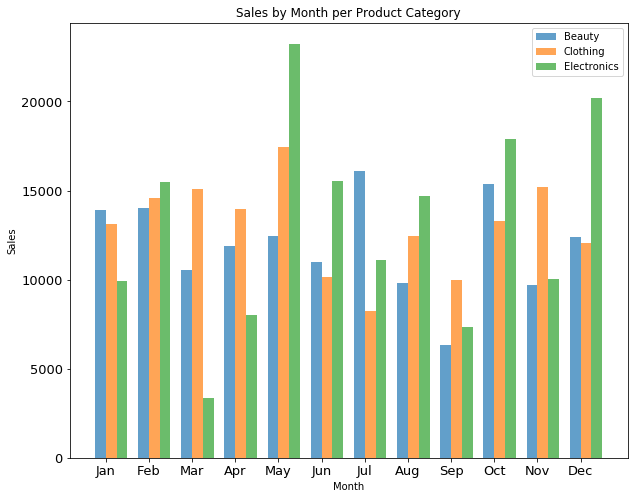

In [72]:
# Month Index
Eks = df_b.iloc[0:,:0]

# Create an array of the same length as ages for the x-axis positions
Eks_axis = np.arange(len(Eks))

# Set the width of the bars
bar_wid = 0.25

# Create the bar plot
plt.bar(Eks_axis - bar_wid/2, df_b['Total Amount'], bar_wid, label='Beauty', alpha=0.7)
plt.bar(Eks_axis + bar_wid/2, df_c['Total Amount'], bar_wid, label='Clothing', alpha=0.7)
plt.bar(Eks_axis + (bar_wid/2)*3 , df_e['Total Amount'], bar_wid, label='Electronics', alpha=0.7)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month per Product Category')
plt.xticks(range(0,len(monther_list.index)), monther_list.index)
plt.legend()
plt.rcParams['figure.figsize'] = [20,10]
plt.rc('xtick', labelsize = 13)
plt.rc('ytick', labelsize = 13)

# Show the plot
plt.show()

#### Conclusion:
            The month of May and Dec has receive sales over 20000 mark. For Clothing, the most sales has brought at the month of May. And the Beauty Category, the month of July has brought the most sales.

### What insights can be gleaned from the distribution of product prices within each category?

In [37]:
df_bb = df[df['Product Category'] == 'Beauty'].groupby('Price per Unit').sum()
df_cc = df[df['Product Category'] == 'Clothing'].groupby('Price per Unit').sum()
df_ee = df[df['Product Category'] == 'Electronics'].groupby('Price per Unit').sum()

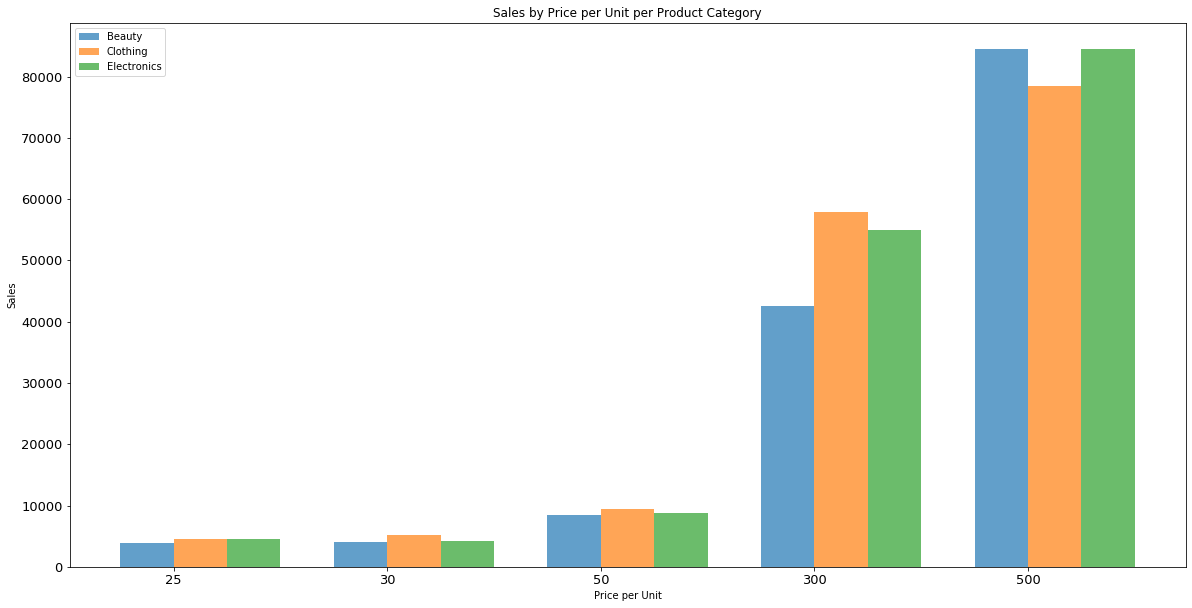

In [38]:
# Price per Unit Index
Eksy = df_bb.iloc[0:,:0]

# Create an array of the same length as ages for the x-axis positions
Eksy_axis = np.arange(len(Eksy))

# Set the width of the bars
bar_wid = 0.25

# Create the bar plot
plt.bar(Eksy_axis - bar_wid/2, df_bb['Total Amount'], bar_wid, label='Beauty', alpha=0.7)
plt.bar(Eksy_axis + bar_wid/2, df_cc['Total Amount'], bar_wid, label='Clothing', alpha=0.7)
plt.bar(Eksy_axis + (bar_wid/2)*3 , df_ee['Total Amount'], bar_wid, label='Electronics', alpha=0.7)

# Customize the plot
plt.xlabel('Price per Unit')
plt.ylabel('Sales')
plt.title('Sales by Price per Unit per Product Category')
plt.xticks(range(0,len(df_bb.index)), df_bb.index)
plt.legend()
#plt.figure(figsize=(10,8))
plt.rcParams['figure.figsize'] = [20,10]
plt.rc('xtick', labelsize = 13)
plt.rc('ytick', labelsize = 13)
# Show the plot
plt.show()

#### Conclusion:
            The 500 Price per Unit held the most sales among the rest as this tell that the expensive the product, the best quality it has.